In [15]:
#imports
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
# Twitter authentication
# Replace args in tweepy.OAuthHandler() and set_access_token with your own 
# access credentials/tokens
auth = tweepy.OAuthHandler("arg1", "arg2")
auth.set_access_token("arg3","arg4")
api = tweepy.API(auth)

# verify authentication
try:
    api.verify_credentials()
    print("Authentication successful")
except:
    print("Authentication failed")

Authentication successful


# Part 1 - Gathering Data

## A. Using Internally Stored Data

The first set of data to gather is a .csv file that is provided as an internal file. Before running any code, this file is stored in our notebook's directory. For this project, all data will be stored in a subfolder of this directory called 'data.' 

Since the data is provided already, there is no need to obtain it. It will be directly read into a Pandas DataFrame using Pandas.read_csv().

In [17]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')

In [18]:
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## B. Downloading Data

The second set of data to gather is a csv file stored on a server that must be downloaded. The URL for the file location has been given, so the Python requests library can be used to download the file.  

In [19]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [20]:
type(response)

requests.models.Response

In [21]:
#Opens a file, name it the same as our download file by splitting the file name
# with str.split() using the forward slash to split the URL and keeping the
# last part of the string
with open(url.split("/")[-1], mode='wb') as file:
    file.write(response.content)

In [22]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [23]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
tweet_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## C. Accessing Data through an API

Data about tweets can be obtained through Twitter's Python API library, tweepy. The Tweepy.API library is used to access Twitter data directly. For this exercise, Tweepy.API.get_statuses() is used to obtain data using a tweet IDs, which are found in tweet_df, the Pandas DataFrame containing tweets.

The cells below retrieve one tweet through the Tweepy API call and examine its contents.

In [25]:
statuses = api.statuses_lookup([tweet_df['tweet_id'][0]])

In [26]:
type(statuses), len(statuses)

(tweepy.models.ResultSet, 1)

In [27]:
type(statuses[0])

tweepy.models.Status

In [28]:
statuses[0]._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [29]:
for key, val in statuses[0]._json.items():
    print(key)

created_at
id
id_str
text
truncated
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


The cell below is the actual API call to retrieve the tweet data.

In [30]:
# maximum requests set by Tweepy API for statuses_lookup()
max_reqs = 100 

# used to ensure that each sub-array (defined below) contains no more than
# max_reqs elements
factor = 1.25 

# sub-arrays to store data returned from call to Tweepy API
num_sub_arrays = len(tweet_df['tweet_id'])/(max_reqs / factor)
statuses_list = []

# call to Tweepy API statuses_lookup()
# results stored in statuses_list
for chunk in np.array_split(tweet_df['tweet_id'], num_sub_arrays):
    statuses_list.append(api.statuses_lookup(chunk.tolist()))

In [31]:
json_file_name = 'tweet_json.txt'
data = []

with open(json_file_name, 'w') as file:
    for i in range(0, len(statuses_list)):
        for j in range(0, len(statuses_list[i])):
            data.append(statuses_list[i][j]._json)
            
    json.dump(data, file)

In [32]:
with open(json_file_name, 'r') as file:
    tweet_count_df = pd.read_json(file)

Based on the previous cell examining the JSON contents of the returned tweet data, only favorite count and retweet count data appear of interest, so these columns will be kept for further analysis.

In [33]:
tweet_count_df = tweet_count_df[['id', 'favorite_count', 'retweet_count']]

In [34]:
tweet_count_df.head()

,id,favorite_count,retweet_count
0,886366144734445568,20045,2925
1,877611172832227328,0,74
2,888078434458587136,20650,3200
3,891689557279858688,39950,7969
4,879492040517615616,22268,2946


# 2. Assessing and Removing Invalid Data

In this section, each data set is examined for cleanliness and tidiness issues. When issues are discovered, they are remedied. First, basic data issues will be addressed. 

Because cleaning the data involves altering the data, it is best to save a copy of the data and conduct cleaning operations of copied data.

In [35]:
tweet_df_clean = tweet_df.copy()
image_df_clean = image_df.copy()
tweet_count_df_clean = tweet_count_df.copy()

In [36]:
len(tweet_df.index), len(image_df.index), len(tweet_count_df.index)

(2356, 2075, 2331)

## a. Tweet Data Validity

### Retweets

Since project specifications state that retweets should be dropped. The below code shows that 181 entries in the data set are retweets. These rows should be removed from the data set before any analysis occurs.

In [37]:
len(tweet_df[tweet_df['retweeted_status_id'].notnull()])

181

In [38]:
tweet_df_clean = tweet_df_clean[tweet_df_clean['retweeted_status_id'].isnull()]

In [39]:
len(tweet_df.index), len(tweet_df_clean.index), len(tweet_df.index) - len(tweet_df_clean.index)

(2356, 2175, 181)

### Tweet replies - are they valid data?

It is worth examining replies to see if replies are valid ratings. This will be done by examining all rows in the tweet_df_clean data frame that contain data in the 'in_reply_to_status_id' column.

The actual contents of a representative reply tweet should also be examined to further investigate the validity of ratings in reply tweets.

In [40]:
tweet_df_clean[tweet_df_clean['in_reply_to_status_id'].notnull()].head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [41]:
# Inspect a given tweet. If the below code returns a value,
# the tweet is indeed a retweet
tweet_df_clean.loc[251]['in_reply_to_user_id']

4196983835.0

To examine these replies closer, it is useful to view the 'text' and the actual tweet on Twitter's website, which can be done by going to the site provided in the 'expanded_urls' columns for replies. However, most replies do not have an entry in the 'expanded_urls' column. The reply located in row 251 is an example of a reply with a URL. 

This rating is not an original rating but instead is an update to a previous rating based on a review of the tweet using the expanded URL. Multiple ratings for the same puppy may not be valid data, so replies should also be removed from the data set before analysis.

The code below shows that there are 78 replies to remove from the data set.

In [42]:
# URL of retweet
tweet_df_clean.loc[251]['expanded_urls']

'https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1'

In [43]:
# Text from retweet
tweet_df_clean.loc[251]['text']

"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B"

In [44]:
len(tweet_df_clean[tweet_df_clean['in_reply_to_status_id'].notnull()])

78

In [45]:
tweet_df_clean = tweet_df_clean[tweet_df_clean['in_reply_to_status_id'].isnull()]

In [46]:
len(tweet_df_clean.index)

2097

After dropping replies from the data set, the number of entries is now 2,097 tweets, which is indeed 78 less than the 2,175 tweets that remained after dropping retweets. To ensure that replies and retweets have been correctly removed from the data set, info() can be used to examine basic data about the data frame. All columns associated with retweets and replies should have zero non-null entries. 

In [47]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Dropping columns that do not contain information

The data from the info() call indeed show that all columns associated with replies and retweets have zero non-null objects. Retweets and replies have been successfully removed.

Because these data no longer provide information, they can be dropped to make the data easier to clean.

In [48]:
tweet_df_clean = tweet_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

In [49]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### b. Image Data Validity

In [50]:
image_df_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


It appears that some images may not actually be dogs. The data for this is stored in the columns p1_dog, p2_dog, and p3_dog. Because the goal of this analysis is to view ratings of dog photos, entries for images that do not contain dogs are not valid and should be removed.

The data are organized such that p1 contains the highest probability guess, so the best indication of an image not containing a dog is if p1_dog is false.

In [51]:
image_df_clean = image_df_clean[image_df_clean['p1_dog']]

In [52]:
len(image_df_clean.index), len(image_df.index) - len(image_df_clean.index)

(1532, 543)

A total of 543 rows were dropped after filtering removing image data that were predicted to be not dogs. The total number of entries in the image data dropped from 2,075 to 1,532.

In [53]:
len(tweet_df_clean[tweet_df_clean['tweet_id'].isin(image_df_clean['tweet_id'])])

1463

There are 1,463 entries where a tweet ID can be found in both the tweets and images data frames. When the data frames are updated to ensure a 1:1 correspondence of tweet entries and image entries, 69 rows from the images data frame will be dropped as will 634 rows from the tweets data frame.

### c. Tweet Count Data Validity

Tweet count data should be reviewed to ensure that all data are valid. The API call only pulled data for tweets in the tweet_df data frame, so there is no concern for having data that is not in the original data set. However, the API call did not retrieve data for all tweets given (2,356 tweets were sent to the API call and 2,331 were returned, meaning that the API call was unable to retrieve data for 25 tweet IDs that were supplied).

In [54]:
tweet_count_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


The info() call above shows that all entries are non-null, so no data should be dropped based on this initial review. No other changes will be made to the tweet_count_df_clean data frame.

# 3. Data Reorganization

## A. Merge Tweet Count Data with other Tweet Data

The tweet_df_clean data frame contains data about the tweets themselves. The tweet_count_df data frame also contains tweet data; therefore, based on the principle of tidy data, these data frames should be merged.

The Pandas merge operation will place the tweet count data in the tweet_df_clean data frame which already contains the rest of the tweet data.

Using Pandas' merge with the 'how' argument set to 'inner' (which is the default option for pd.merge()) performs an inner merge, which will solve the problem of removing entries for which the API call did not provide additional data.

In [55]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [56]:
tweet_df_clean = pd.merge(tweet_df_clean, tweet_count_df_clean, left_on = 'tweet_id', right_on = 'id')

In [57]:
# drop 'id' since it contains the exact same information as 'tweet_id'
tweet_df_clean = tweet_df_clean.drop(columns=['id'])

In [58]:
# Ensure that there are no duplicate tweets in the data set
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 14 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null object
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
doggo                 2090 non-null object
floofer               2090 non-null object
pupper                2090 non-null object
puppo                 2090 non-null object
favorite_count        2090 non-null int64
retweet_count         2090 non-null int64
dtypes: int64(5), object(9)
memory usage: 244.9+ KB


## B. Ensure that all Tweets Have Corresponding Image

Each tweet should have a corresponding image, so any tweet data that does not have an image associated with it should be dropped. Since tweet IDs are available in both the tweet_df_clean and image_df_clean data frames, this can be used to compare the contents of the data frame. 

The below code shows for reference the number of tweets remaining in our tweet_df_clean data frame after previous cleaning operations and the number of tweets for which there is a matching entry in the images data frame (matching is done using the 'tweet_id' for both columns).

In [59]:
len(tweet_df_clean.index), len(tweet_df_clean[tweet_df_clean['tweet_id'].isin(image_df_clean['tweet_id'])])

(2090, 1456)

In [60]:
# Any tweets that do not have an associated image will be dropped.

tweet_df_clean = tweet_df_clean[tweet_df_clean['tweet_id'].isin(image_df_clean['tweet_id'])]

In [61]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 2089
Data columns (total 14 columns):
tweet_id              1456 non-null int64
timestamp             1456 non-null object
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null int64
rating_denominator    1456 non-null int64
name                  1456 non-null object
doggo                 1456 non-null object
floofer               1456 non-null object
pupper                1456 non-null object
puppo                 1456 non-null object
favorite_count        1456 non-null int64
retweet_count         1456 non-null int64
dtypes: int64(5), object(9)
memory usage: 170.6+ KB


To ensure that there is an image entry for every tweet, isin() can be used again to ensure that the length of the resulting tweet_df_clean is the same as the number of items in tweet_df for which there is a match in images_df. A match ensures that the operation was completed as expected.

In [62]:
len(tweet_df_clean.index), len(image_df_clean[image_df_clean['tweet_id'].isin(tweet_df_clean['tweet_id'])])

(1456, 1456)

In [63]:
len(tweet_df_clean.index), len(image_df_clean.index)

(1456, 1532)

## C. Ensure that all Images Have Corresponding Tweet

The image_df_clean data frame should also be reviewed to ensure that it only contains images that correspond with tweets in our data set. This will be done with the same set of procedures used above.

In [64]:
len(tweet_df_clean.index), len(image_df_clean.index)

(1456, 1532)

In [65]:
# Any images that do not have an associated tweet will be dropped.

image_df_clean = image_df_clean[image_df_clean['tweet_id'].isin(tweet_df_clean['tweet_id'])]

In [66]:
len(tweet_df_clean.index), len(image_df_clean.index)

(1456, 1456)

# 4. Additional Steps to Tidy and Clean Data

### A. Dog stage columns

There are four columns for dog stage ('doggo', 'floofer', 'pupper', and 'puppo'), which should be condensed to one column that contains the stage of dog to make the data tidier. To confirm that only data regarding stage is stored in each column, series.unique() is run for each of the columns below.

In [67]:
tweet_df_clean['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [68]:
tweet_df_clean['floofer'].value_counts()

None       1448
floofer       8
Name: floofer, dtype: int64

In [69]:
tweet_df_clean['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [70]:
tweet_df_clean['doggo'].value_counts()

None     1400
doggo      56
Name: doggo, dtype: int64

In [71]:
tweet_df_clean['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [72]:
tweet_df_clean['pupper'].value_counts()

None      1305
pupper     151
Name: pupper, dtype: int64

In [73]:
tweet_df_clean['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [74]:
tweet_df_clean['puppo'].value_counts()

None     1436
puppo      20
Name: puppo, dtype: int64

Based on the above value counts, there are a total of 235 values for the four dog stages. The next two cells return the number of entries that have no dog stage value and the number that have exactly one dog stage value.

In [75]:
len(tweet_df_clean[(tweet_df_clean['floofer'] == 'None') & (tweet_df_clean['doggo'] == 'None') & (tweet_df_clean['pupper'] == 'None') & (tweet_df_clean['puppo'] == 'None')])

1230

In [76]:
len(tweet_df_clean[(tweet_df_clean['floofer'] == 'floofer') ^ (tweet_df_clean['doggo'] == 'doggo') ^ (tweet_df_clean['pupper'] == 'pupper') ^ (tweet_df_clean['puppo'] == 'puppo')])

217

Based on the above calculations, we have 1,230 rows where are the no dog stages provided and 217 rows where exactly one value is provided. Based on the four value_counts() calls above, there are a total of 235 dog stage values. Given these two facts, it is plausible that there are nine rows with exactly two dog stage values. If this is the case, those rows would contain two dog stage values per row, or 18 total values. These 18 values in addition to the 217 unique value sum to the original 235 dog stage values obtained from the value counts on the individual dog stage columns.

In [77]:
tweet_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 2089
Data columns (total 4 columns):
doggo      1456 non-null object
floofer    1456 non-null object
pupper     1456 non-null object
puppo      1456 non-null object
dtypes: object(4)
memory usage: 56.9+ KB


The strategy for replacing the 

In [78]:
stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']

for col in stage_cols:
        tweet_df_clean[col] = tweet_df_clean[col].apply(lambda x: x.replace('None', ''))

In [79]:
tweet_df_clean['dog_stage'] = tweet_df_clean['doggo'] + tweet_df_clean['floofer'] + tweet_df_clean['pupper'] + tweet_df_clean['puppo']

In [80]:
tweet_df_clean = tweet_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [81]:
tweet_df_clean['strlen'] = tweet_df_clean['dog_stage'].apply(lambda x: len(x))

In [82]:
tweet_df_clean[tweet_df_clean['strlen'] > 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,strlen
153,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,44791,17503,doggopuppo,10
160,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,16003,3090,doggofloofer,12
354,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,11031,2782,doggopupper,11
412,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,9071,2287,doggopupper,11
442,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,8359,2186,doggopupper,11
684,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,6088,1949,doggopupper,11
742,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,4474,1125,doggopupper,11
842,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,9586,3138,doggopupper,11
891,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,50595,17017,doggopupper,11


In [83]:
def doggo_replace(s):
    
    val = s
    
    if len(val) > 7:
        val = val.replace('doggo', '')
    
    return val

In [84]:
tweet_df_clean['dog_stage'] = tweet_df_clean['dog_stage'].apply(lambda x: doggo_replace(x))

In [85]:
tweet_df_clean[tweet_df_clean['strlen'] > 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,strlen
153,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,44791,17503,puppo,10
160,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,16003,3090,floofer,12
354,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,11031,2782,pupper,11
412,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,9071,2287,pupper,11
442,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,8359,2186,pupper,11
684,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,6088,1949,pupper,11
742,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,4474,1125,pupper,11
842,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,9586,3138,pupper,11
891,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,50595,17017,pupper,11


In [86]:
tweet_df_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [87]:
def blank_replace(s):
    
    val = s
    
    if val == '':
        val = 'None'
    
    return val

In [88]:
tweet_df_clean['dog_stage'] = tweet_df_clean['dog_stage'].apply(lambda x: blank_replace(x))

In [89]:
tweet_df_clean['dog_stage'].value_counts()

None       1230
pupper      151
doggo        47
puppo        20
floofer       8
Name: dog_stage, dtype: int64

In [90]:
tweet_df_clean = tweet_df_clean.drop(columns=['strlen'])

In [91]:
tweet_df_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31557,5779,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23772,3824,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,38152,8605,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,19192,2871,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,11183,1889,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,61755,17420,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,26435,3961,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,30232,6784,doggo
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,29093,6768,None
11,889880896479866881,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,26432,4615,None


### B. Column Data Types

In both the tweet_df_clean and images_df_clean data frames, the 'tweet_id' column stores tweet IDs as integers. Since these data are used only for identification, no mathematical operations should be done with them. Therefore 'tweet_id' should be converted to a string. 

The column 'retweeted_status_timestamp' is currently string type data that should be converted to date-time.

In [92]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 2089
Data columns (total 11 columns):
tweet_id              1456 non-null int64
timestamp             1456 non-null object
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null int64
rating_denominator    1456 non-null int64
name                  1456 non-null object
favorite_count        1456 non-null int64
retweet_count         1456 non-null int64
dog_stage             1456 non-null object
dtypes: int64(5), object(6)
memory usage: 136.5+ KB


In [93]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1456 non-null int64
jpg_url     1456 non-null object
img_num     1456 non-null int64
p1          1456 non-null object
p1_conf     1456 non-null float64
p1_dog      1456 non-null bool
p2          1456 non-null object
p2_conf     1456 non-null float64
p2_dog      1456 non-null bool
p3          1456 non-null object
p3_conf     1456 non-null float64
p3_dog      1456 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 118.0+ KB


In [94]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1456 non-null int64
jpg_url     1456 non-null object
img_num     1456 non-null int64
p1          1456 non-null object
p1_conf     1456 non-null float64
p1_dog      1456 non-null bool
p2          1456 non-null object
p2_conf     1456 non-null float64
p2_dog      1456 non-null bool
p3          1456 non-null object
p3_conf     1456 non-null float64
p3_dog      1456 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 118.0+ KB


In [95]:
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype(str)
tweet_df_clean['timestamp'] = pd.to_datetime(tweet_df_clean['timestamp'])

In [96]:
tweet_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31557,5779,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23772,3824,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,38152,8605,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,19192,2871,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,11183,1889,None


In [97]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 2089
Data columns (total 11 columns):
tweet_id              1456 non-null object
timestamp             1456 non-null datetime64[ns]
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null int64
rating_denominator    1456 non-null int64
name                  1456 non-null object
favorite_count        1456 non-null int64
retweet_count         1456 non-null int64
dog_stage             1456 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 136.5+ KB


In [98]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1456 non-null object
jpg_url     1456 non-null object
img_num     1456 non-null int64
p1          1456 non-null object
p1_conf     1456 non-null float64
p1_dog      1456 non-null bool
p2          1456 non-null object
p2_conf     1456 non-null float64
p2_dog      1456 non-null bool
p3          1456 non-null object
p3_conf     1456 non-null float64
p3_dog      1456 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 118.0+ KB


The methods head() and info() are called above as necessary to confirm that we have successfully converted the data types of the 'tweet_id' and 'timestamp' columns as applicable.

## C. Reviewing Ratings for Accuracy

The project description mentioned that some ratings may not be accurate. The Pandas str.extract() method can be used to extract the ratings from the tweet text. The resulting data can be compared to the ratings in the tweet_df_clean data frame for any inaccuracies.

In [99]:
tweet_df_clean['extracted_rating'] = tweet_df_clean['text'].str.extract('(\d{1,4}\/\d{1,4})')

In [100]:
tweet_df_clean['extracted_num'] = tweet_df_clean['extracted_rating'].apply(lambda x: x.split('/')[0])
tweet_df_clean['extracted_den'] = tweet_df_clean['extracted_rating'].apply(lambda x: x.split('/')[1])

In [101]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 2089
Data columns (total 14 columns):
tweet_id              1456 non-null object
timestamp             1456 non-null datetime64[ns]
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null int64
rating_denominator    1456 non-null int64
name                  1456 non-null object
favorite_count        1456 non-null int64
retweet_count         1456 non-null int64
dog_stage             1456 non-null object
extracted_rating      1456 non-null object
extracted_num         1456 non-null object
extracted_den         1456 non-null object
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 170.6+ KB


In [102]:
tweet_df_clean['extracted_num'] = tweet_df_clean['extracted_num'].astype(int)
tweet_df_clean['extracted_den'] = tweet_df_clean['extracted_den'].astype(int)

In [103]:
tweet_df_clean[(tweet_df_clean['rating_numerator'] != tweet_df_clean['extracted_num']) | (tweet_df_clean['rating_denominator'] != tweet_df_clean['extracted_den'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den


In [104]:
(tweet_df_clean['extracted_num'] == tweet_df_clean['rating_numerator']).sum()

1456

In [105]:
tweet_df_clean['extracted_rating_2'] = tweet_df_clean['text'].str.findall('(\d{1,4}\/\d{1,4})')

In [106]:
tweet_df_clean['num_fractions'] = tweet_df_clean['extracted_rating_2'].apply(lambda x: len(x))

In [107]:
tweet_df_clean['num_fractions'].value_counts()

1    1432
2      23
3       1
Name: num_fractions, dtype: int64

In [108]:
multiple_fractions = tweet_df_clean[tweet_df_clean['num_fractions'] > 1]

In [109]:
multiple_fractions

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den,extracted_rating_2,num_fractions
583,777684233540206592,2016-09-19 01:42:24,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,11528,3015,None,12/10,12,10,"[12/10, 11/10]",2
791,747600769478692864,2016-06-28 01:21:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,2353,558,None,10/10,10,10,"[10/10, 7/10]",2
847,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,35304,13418,None,9/11,9,11,"[9/11, 14/10]",2
942,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,4126,1568,None,4/20,4,20,"[4/20, 13/10]",2
979,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2386,210,None,50/50,50,50,"[50/50, 11/10]",2
999,714258258790387713,2016-03-28 01:10:13,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,3051,720,None,10/10,10,10,"[10/10, 8/10]",2
1130,703356393781329922,2016-02-26 23:10:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,1933,388,None,9/10,9,10,"[9/10, 2/10]",2
1233,694352839993344000,2016-02-02 02:53:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,2051,621,None,10/10,10,10,"[10/10, 5/10]",2
1272,691483041324204033,2016-01-25 04:49:38,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,2411,567,None,5/10,5,10,"[5/10, 10/10]",2
1288,690400367696297985,2016-01-22 05:07:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,1905,457,None,10/10,10,10,"[10/10, 6/10]",2


All tweets with multiple fractions will be written to a text file so that the text of the tweet is easier to read. The tweets with multiple fractions will be read to ensure that the ratings match the ratings in the text. Any obviously incorrect ratings will be noted and updated.

In [110]:
output_tweet_text = []
with open('multiple_fractions.txt', 'w') as file:
    for i in range(0, len(multiple_fractions.index)):
        file.write(str(i))
        file.write(' - ')
        file.write(str(multiple_fractions.iloc[i]['tweet_id']))
        file.write(' - ')
        file.write(multiple_fractions.iloc[i]['text'])
        file.write('\n')

Based on a review of tweets, the following tweets should be updated.

| Tweet ID           | Current Rating | Corrected Rating |
| ------------------ | -------------- | ---------------  |
| 722974582966214656 | 4/20           |     13/10        |
| 716439118184652801 | 50/50          |     11/10        |
| 740373189193256964 | 9/11           |     14/10        |
| 666287406224695296 | 1/2            |     9/10         |

In [111]:
tweet_df_clean[tweet_df_clean['tweet_id'] == 722974582966214656]['rating_numerator'] = 13
tweet_df_clean[tweet_df_clean['tweet_id'] == 722974582966214656]['rating_denominator'] = 10

tweet_df_clean[tweet_df_clean['tweet_id'] == 716439118184652801]['rating_numerator'] = 11
tweet_df_clean[tweet_df_clean['tweet_id'] == 716439118184652801]['rating_denominator'] = 10

tweet_df_clean[tweet_df_clean['tweet_id'] == 740373189193256964]['rating_numerator'] = 14
tweet_df_clean[tweet_df_clean['tweet_id'] == 740373189193256964]['rating_denominator'] = 10

tweet_df_clean[tweet_df_clean['tweet_id'] == 666287406224695296]['rating_numerator'] = 9
tweet_df_clean[tweet_df_clean['tweet_id'] == 666287406224695296]['rating_denominator'] = 10

## D. Reviewing Names for Accuracy

Several entries do not have names. It is worthwhile to review the tweet texts to ensure that no name is located in the text.

In [112]:
print('There are ' + repr(len(tweet_df_clean[tweet_df_clean['name'] == 'None'])) + ' tweets recorded has having no name.')

There are 349 tweets recorded has having no name.


In [113]:
no_names = tweet_df_clean[tweet_df_clean['name'] == 'None']

In [114]:
with open('no_names.txt', 'w') as file:
    for i in range(0, len(no_names.index)):
        file.write(str(i))
        file.write(' - ')
        file.write(str(no_names.iloc[i]['tweet_id']))
        file.write(' - ')
        file.write(no_names.iloc[i]['text'])
        file.write('\n')

| Tweet ID           | Name           |
| ------------------ | -------------- |
| 857393404942143489 | Meeko          |
| 836001077879255040 | Atlas          |     
| 831650051525054464 | Blue           |
| 826204788643753985 | Dew            |
| 788178268662984705 | Atlas          |
| 778039087836069888 | Max            |
| 740373189193256964 | Bretagne       |
| 708026248782585858 | Frank          |

In [115]:
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '857393404942143489', 'name'] = 'Meeko'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '836001077879255040', 'name'] = 'Atlas'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '831650051525054464', 'name'] = 'Blue'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '826204788643753985', 'name'] = 'Dew'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '788178268662984705', 'name'] = 'Atlas'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '778039087836069888', 'name'] = 'Max'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '740373189193256964', 'name'] = 'Bretagne'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '708026248782585858', 'name'] = 'Frank'

In [116]:
tweet_df_clean[tweet_df_clean['tweet_id'] == '857393404942143489']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den,extracted_rating_2,num_fractions
147,857393404942143489,2017-04-27 00:38:11,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",https://www.gofundme.com/meeko-needs-heart-sur...,13,10,Meeko,5754,1587,None,13/10,13,10,[13/10],1


In addition to these updates found by reviewing entries with no name, other errors encountered included the names 'an' and 'just.' These entries should also be corrected.

In [117]:
len(tweet_df_clean[tweet_df_clean['name'] == 'an']), len(tweet_df_clean[tweet_df_clean['name'] == 'just'])

(3, 2)

In [118]:
names_an = tweet_df_clean[tweet_df_clean['name'] == 'an']

In [119]:
names_just = tweet_df_clean[tweet_df_clean['name'] == 'just']

In [120]:
with open('name_errors.txt', 'w') as file:
    for i in range(0, len(names_an.index)):
        file.write(str(i))
        file.write(' - ')
        file.write(str(names_an.iloc[i]['tweet_id']))
        file.write(' - ')
        file.write(names_an.iloc[i]['text'])
        file.write('\n')
        
    for i in range(0, len(names_just.index)):
        file.write(str(i))
        file.write(' - ')
        file.write(str(names_just.iloc[i]['tweet_id']))
        file.write(' - ')
        file.write(names_just.iloc[i]['text'])
        file.write('\n')

Based on a review of these tweets, these names should be changed to 'None.'

In [121]:
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '746369468511756288', 'name'] = 'None'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '668636665813057536', 'name'] = 'None'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '666287406224695296', 'name'] = 'None'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '741067306818797568', 'name'] = 'None'
tweet_df_clean.at[tweet_df_clean['tweet_id'] == '695095422348574720', 'name'] = 'None'

In [122]:
tweet_df_clean[tweet_df_clean['name'] == 'an']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den,extracted_rating_2,num_fractions


In [123]:
tweet_df_clean[tweet_df_clean['name'] == 'just']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den,extracted_rating_2,num_fractions


In [124]:
tweet_df_clean[tweet_df_clean['tweet_id'] == '746369468511756288']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,extracted_rating,extracted_num,extracted_den,extracted_rating_2,num_fractions
805,746369468511756288,2016-06-24 15:48:42,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,None,6247,1645,None,9/10,9,10,[9/10],1


In [125]:
# Drop columns that were not part of original data set

tweet_df_clean = tweet_df_clean.drop(columns=['extracted_rating', 'extracted_num', 'extracted_den', 'extracted_rating_2', 'num_fractions'])

# 5. Visualization

The cleaned data will be used to view number of favorites by dog stage.

In [126]:
doggo_faves = tweet_df_clean[tweet_df_clean['dog_stage'] == 'doggo']['favorite_count'].sum()
floofer_faves = tweet_df_clean[tweet_df_clean['dog_stage'] == 'floofer']['favorite_count'].sum()
puppo_faves = tweet_df_clean[tweet_df_clean['dog_stage'] == 'puppo']['favorite_count'].sum()
pupper_faves = tweet_df_clean[tweet_df_clean['dog_stage'] == 'pupper']['favorite_count'].sum()

fave_counts = [pupper_faves, doggo_faves, puppo_faves, floofer_faves]
fave_counts

[1190060, 970042, 464420, 101536]

In [127]:
tweet_df_clean['dog_stage'].value_counts()

None       1230
pupper      151
doggo        47
puppo        20
floofer       8
Name: dog_stage, dtype: int64

In [128]:
dog_stage_names = tweet_df_clean['dog_stage'].value_counts().index[1:].tolist()
dog_stage_names

['pupper', 'doggo', 'puppo', 'floofer']

In [129]:
dog_stage_counts = tweet_df_clean['dog_stage'].value_counts()[1:].tolist()
dog_stage_counts

[151, 47, 20, 8]

In [130]:
faves_averages = np.asarray(fave_counts) / np.asarray(dog_stage_counts)
faves_averages

array([  7881.19205298,  20639.19148936,  23221.        ,  12692.        ])

In [131]:
doggo_retweets = tweet_df_clean[tweet_df_clean['dog_stage'] == 'doggo']['retweet_count'].sum()
floofer_retweets = tweet_df_clean[tweet_df_clean['dog_stage'] == 'floofer']['retweet_count'].sum()
puppo_retweets = tweet_df_clean[tweet_df_clean['dog_stage'] == 'puppo']['retweet_count'].sum()
pupper_retweets = tweet_df_clean[tweet_df_clean['dog_stage'] == 'pupper']['retweet_count'].sum()

retweet_counts = [pupper_retweets, doggo_retweets, puppo_retweets, floofer_retweets]
retweet_counts

[361402, 335504, 131565, 33979]

In [132]:
retweet_averages = np.asarray(retweet_counts) / np.asarray(dog_stage_counts)
retweet_averages

array([ 2393.39072848,  7138.38297872,  6578.25      ,  4247.375     ])

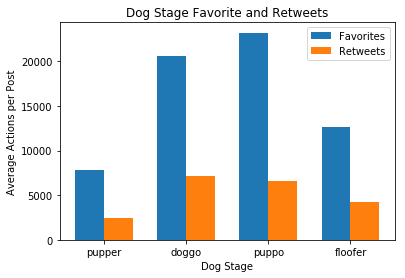

In [133]:
ticks = np.arange(len(dog_stage_names))
bar_width = 0.35

faves_bar = plt.bar(ticks, faves_averages, bar_width, label='Favorites')
retweets_bar = plt.bar(ticks + bar_width, retweet_averages, bar_width, label='Retweets')

plt.xticks(ticks + bar_width / 2, dog_stage_names)
plt.xlabel('Dog Stage')
plt.ylabel('Average Actions per Post')
plt.title('Dog Stage Favorite and Retweets')
plt.legend();

In [134]:
tweet_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [135]:
image_df_clean.to_csv('image_pred_archive_master.csv', index=False)

# 6. Summary of Issues Addressed

### Tidiness Issues
1. Merging additional tweet data (retweet count and favorite count) into the tweet data frame
2. Combining the dog stage data into one columns, instead of the original four

### Cleanliness Issues
1. Removing retweets
2. Removing replies 
3. Removing images that were identified as not a dog
4. Removing tweets for which additional tweet data could not be retrieved via API call
5. Removing tweets for which there was no associated image and removing images that did not correspond to a tweet with a rating
6. Dropping columns that did not have useful data
7. Changing column data types to more appropriate data types
8. Fixing errors with ratings (ratings columns did not match ratings found in the text)
9. Fixing errors found in dog names